# 1.)Check eligibility of the Customer given the inputs described above.(Classification)


# Read Data

In [75]:
import pandas as pd
from warnings import filterwarnings 
filterwarnings("ignore")

A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/training_set.csv")
B=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/testing_set.csv")


In [2]:
A

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0         NaN             360.0   
1                NaN             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# Missing Data Treatment

In [3]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
from Wd8pm import replacer
replacer(A)

# for test data Fill mean from A

In [7]:
x = A['Gender'].mode()[0]
B['Gender'] = B['Gender'].fillna(x)
x

'Male'

In [8]:
x = A['Dependents'].mode()[0]
B['Dependents'] = B['Dependents'].fillna(x)
x

'0'

In [9]:
x = A['Self_Employed'].mode()[0]
B['Self_Employed'] = B['Self_Employed'].fillna(x)
x

'No'

In [10]:
x = round(A['LoanAmount'].mean(),2)
B['LoanAmount'] = B['LoanAmount'].fillna(x)
x

146.41

In [11]:
x = round(A['Loan_Amount_Term'].mean(),2)
B['Loan_Amount_Term'] = B['Loan_Amount_Term'].fillna(x)

In [12]:
x =A['Credit_History'].mode()[0]
B['Credit_History']= B['Credit_History'].fillna(x)

In [13]:
A.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Unique values

In [15]:
A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
B.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           145
Loan_Amount_Term      13
Credit_History         2
Property_Area          3
dtype: int64

# Outliers removal

In [17]:
from Wd8pm import OL
out = OL(A)

In [18]:
A = A.drop(index=out,axis=0)

In [19]:
A.shape

(577, 13)

In [20]:
A.index=range(0,577)

# Bivariate Analysis

In [21]:
Y= A["Loan_Status"]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

# NeuralNetworks

In [22]:
Y= A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y.Loan_Status),columns=["Loan_Status"])

In [24]:
from Wd8pm import catcon
cat,con=catcon(X)

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

# Splitting

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [28]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
15/15 [==============================] - 1s 17ms/step - loss: 3.8316 - accuracy: 0.6659 - val_loss: 2.6637 - val_accuracy: 0.7759
Epoch 2/250
15/15 [==============================] - 0s 3ms/step - loss: 1.9661 - accuracy: 0.7115 - val_loss: 2.0574 - val_accuracy: 0.8190
Epoch 3/250
15/15 [==============================] - 0s 3ms/step - loss: 2.1949 - accuracy: 0.7093 - val_loss: 2.3959 - val_accuracy: 0.6034
Epoch 4/250
15/15 [==============================] - 0s 3ms/step - loss: 2.3364 - accuracy: 0.6985 - val_loss: 1.7176 - val_accuracy: 0.8017
Epoch 5/250
15/15 [==============================] - 0s 3ms/step - loss: 2.1358 - accuracy: 0.7527 - val_loss: 1.6604 - val_accuracy: 0.6724
Epoch 6/250
15/15 [==============================] - 0s 3ms/step - loss: 2.1900 - accuracy: 0.7375 - val_loss: 1.8342 - val_accuracy: 0.6207
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - loss: 2.1273 - accuracy: 0.7570 - val_loss: 2.2923 - val_accuracy: 0.8362
Epoch 8/250


In [29]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

([<matplotlib.axis.XTick at 0x269fccf66a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

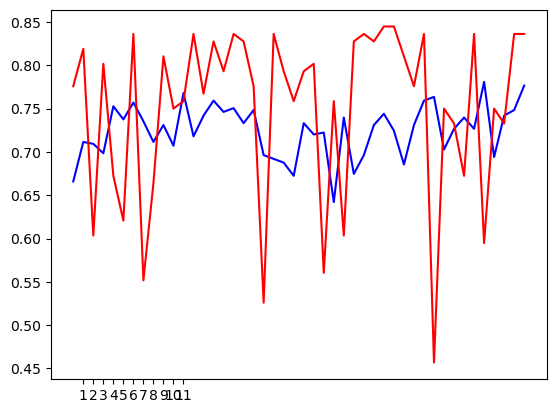

In [30]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")
plt.xticks(range(1,12,1))

# Training using Entire data

In [31]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Ynew,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
19/19 [==============================] - 1s 9ms/step - loss: 0.3445 - val_loss: 0.1950
Epoch 2/250
19/19 [==============================] - 0s 3ms/step - loss: 0.2111 - val_loss: 0.1379
Epoch 3/250
19/19 [==============================] - 0s 3ms/step - loss: 0.2000 - val_loss: 0.2272
Epoch 4/250
19/19 [==============================] - 0s 3ms/step - loss: 0.2008 - val_loss: 0.1884
Epoch 5/250
19/19 [==============================] - 0s 3ms/step - loss: 0.1999 - val_loss: 0.1419
Epoch 6/250
19/19 [==============================] - 0s 3ms/step - loss: 0.1836 - val_loss: 0.1654
Epoch 7/250
19/19 [==============================] - 0s 3ms/step - loss: 0.1845 - val_loss: 0.4039
Epoch 8/250
19/19 [==============================] - 0s 3ms/step - loss: 0.1861 - val_loss: 0.1574
Epoch 9/250
19/19 [==============================] - 0s 3ms/step - loss: 0.1696 - val_loss: 0.1688
Epoch 10/250
19/19 [==============================] - 0s 3ms/step - loss: 0.1807 - val_loss: 0.1789
Epoch 11/

# Predict

In [32]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)


12/12 [==============================] - 0s 866us/step


In [33]:

pred

array([[ 1.0517706 ],
       [ 1.0125656 ],
       [ 1.0596023 ],
       [ 1.1117327 ],
       [ 1.0791472 ],
       [ 0.9888105 ],
       [ 1.0768474 ],
       [-0.06001267],
       [ 1.0100688 ],
       [ 1.0107322 ],
       [ 1.0762962 ],
       [ 0.8891885 ],
       [ 1.1112716 ],
       [ 0.05044509],
       [ 1.1810315 ],
       [ 1.0341676 ],
       [ 1.0894374 ],
       [ 0.8718477 ],
       [ 1.1845729 ],
       [ 1.1401051 ],
       [ 0.9885284 ],
       [ 1.2510751 ],
       [ 1.121901  ],
       [ 1.2482451 ],
       [ 1.1096381 ],
       [ 0.6502216 ],
       [ 1.0658307 ],
       [ 1.0943561 ],
       [ 0.9739894 ],
       [ 1.21985   ],
       [ 1.1483026 ],
       [ 1.037833  ],
       [ 1.034152  ],
       [ 1.1098926 ],
       [ 1.097149  ],
       [ 0.14034347],
       [ 1.1599336 ],
       [ 1.0402125 ],
       [ 1.023161  ],
       [ 1.1597772 ],
       [ 1.0743248 ],
       [ 1.3026631 ],
       [ 0.9476421 ],
       [ 1.0370134 ],
       [ 1.3095856 ],
       [ 1

In [34]:
Q=[]
for i in pred:
    Q.append(int(i[0]))

In [35]:
B["Loan_Status"]=le.inverse_transform(Q)

In [36]:
B

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
3               2340               2546       100.0             360.0   
4               3276                  0        78.0             360.0   
..               ...                ...         ...               ...   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Urban           Y  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
362             1.0         Urban           N  
363             1.0         Urban           Y  
364             1.0     Semiurban           Y  
365             1.0         Rural           N  
366             1.0         Rural           N  

[367 rows x 13 columns]

# Second Question

In [37]:
Xb=B.drop(labels=["Loan_ID"],axis=1)
Xb=B[(B.Loan_Status=="N")]

In [38]:
N_cust=Xb

In [39]:
Xb.shape

(204, 13)

In [41]:
Xb.index=range(0,204)

# Bivariate analysis

In [42]:
Y= A["LoanAmount"]
X=A.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)
Xb=Xb.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)

In [43]:
from Wd8pm import catcon
cat,con=catcon(X)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

In [44]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)


In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
15/15 [==============================] - 1s 11ms/step - loss: 16898.4102 - val_loss: 6718.7588
Epoch 2/250
15/15 [==============================] - 0s 3ms/step - loss: 4231.9995 - val_loss: 2803.0420
Epoch 3/250
15/15 [==============================] - 0s 3ms/step - loss: 3132.9600 - val_loss: 2670.7588
Epoch 4/250
15/15 [==============================] - 0s 3ms/step - loss: 3085.8699 - val_loss: 2781.3518
Epoch 5/250
15/15 [==============================] - 0s 3ms/step - loss: 2955.4680 - val_loss: 2636.2778
Epoch 6/250
15/15 [==============================] - 0s 3ms/step - loss: 2864.8608 - val_loss: 2457.7397
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - loss: 2944.4861 - val_loss: 2450.7437
Epoch 8/250
15/15 [==============================] - 0s 3ms/step - loss: 2837.5598 - val_loss: 3047.0808
Epoch 9/250
15/15 [==============================] - 0s 3ms/step - loss: 2760.4041 - val_loss: 2305.4785
Epoch 10/250
15/15 [==============================] -

In [46]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

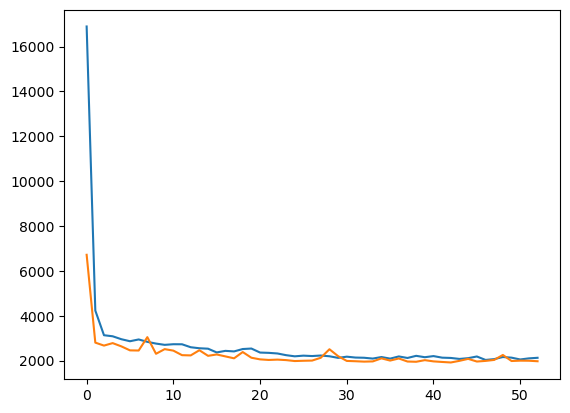

In [47]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

# Training using entire data

In [48]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
19/19 [==============================] - 1s 9ms/step - loss: 14284.7490 - val_loss: 3569.1658
Epoch 2/250
19/19 [==============================] - 0s 3ms/step - loss: 3290.7603 - val_loss: 2753.8701
Epoch 3/250
19/19 [==============================] - 0s 3ms/step - loss: 3134.2651 - val_loss: 2557.9656
Epoch 4/250
19/19 [==============================] - 0s 3ms/step - loss: 2973.9580 - val_loss: 2620.0569
Epoch 5/250
19/19 [==============================] - 0s 3ms/step - loss: 2788.0813 - val_loss: 2783.1013
Epoch 6/250
19/19 [==============================] - 0s 3ms/step - loss: 2855.3203 - val_loss: 3402.3479
Epoch 7/250
19/19 [==============================] - 0s 3ms/step - loss: 2769.9160 - val_loss: 2604.2542
Epoch 8/250
19/19 [==============================] - 0s 3ms/step - loss: 2653.1902 - val_loss: 2279.4045
Epoch 9/250
19/19 [==============================] - 0s 3ms/step - loss: 2697.1670 - val_loss: 2195.7715
Epoch 10/250
19/19 [==============================] - 

In [49]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)


pred

7/7 [==============================] - 0s 1ms/step


array([[146.13179 ],
       [130.7061  ],
       [137.17824 ],
       [216.87186 ],
       [144.89508 ],
       [124.445206],
       [423.40265 ],
       [133.99472 ],
       [114.083015],
       [123.73319 ],
       [176.95824 ],
       [141.10522 ],
       [171.54092 ],
       [127.024826],
       [107.0982  ],
       [174.02545 ],
       [130.48697 ],
       [125.670906],
       [155.44978 ],
       [118.28445 ],
       [135.3487  ],
       [127.46628 ],
       [123.90895 ],
       [158.64467 ],
       [186.4056  ],
       [154.59239 ],
       [173.8286  ],
       [140.90262 ],
       [184.5216  ],
       [157.68303 ],
       [779.9456  ],
       [145.38329 ],
       [165.54514 ],
       [114.92756 ],
       [150.64624 ],
       [230.7952  ],
       [171.46742 ],
       [157.92535 ],
       [176.14494 ],
       [192.44064 ],
       [168.70798 ],
       [121.09185 ],
       [118.37199 ],
       [128.55922 ],
       [ 96.35363 ],
       [121.17924 ],
       [146.56525 ],
       [129.0

In [50]:
N_cust["Loan_Amount"]=pred

C:\Users\Suja4\AppData\Local\Temp\ipykernel_20996\911675333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_cust["Loan_Amount"]=pred


In [51]:
N_cust

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001054   Male     Yes          0  Not Graduate           Yes   
1    LP001056   Male     Yes          2  Not Graduate            No   
2    LP001082   Male     Yes          1      Graduate            No   
3    LP001094   Male     Yes          2      Graduate            No   
4    LP001107   Male     Yes         3+      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
199  LP002954   Male     Yes          2  Not Graduate            No   
200  LP002969   Male     Yes          1      Graduate            No   
201  LP002971   Male     Yes         3+  Not Graduate           Yes   
202  LP002986   Male     Yes          0      Graduate            No   
203  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               2165               3422       152.0             360.0   
1               3881                  0       147.0             360.0   
2               2185               1516       162.0             360.0   
3              12173                  0       166.0             360.0   
4               3786                333       126.0             360.0   
..               ...                ...         ...               ...   
199             3132                  0        76.0             360.0   
200             2269               2167        99.0             360.0   
201             4009               1777       113.0             360.0   
202             5000               2393       158.0             360.0   
203             9200                  0        98.0             180.0   

     Credit_History Property_Area Loan_Status  Loan_Amount  
0               1.0         Urban           N   146.131790  
1               0.0         Rural           N   130.706100  
2               1.0     Semiurban           N   137.178238  
3               0.0     Semiurban           N   216.871857  
4               1.0     Semiurban           N   144.895081  
..              ...           ...         ...          ...  
199             1.0         Rural           N   118.953995  
200             1.0     Semiurban           N   147.164932  
201             1.0         Urban           N   157.966385  
202             1.0         Rural           N   167.106064  
203             1.0         Rural           N   149.066513  

[204 rows x 14 columns]

# b.)if duration is less than equal to 20 years,

# is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [52]:
B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]

Loan_ID Gender Married Dependents     Education Self_Employed  \
59   LP001324   Male     Yes         3+      Graduate            No   
84   LP001450   Male     Yes          0      Graduate            No   
103  LP001548   Male     Yes          2  Not Graduate            No   
141  LP001787   Male     Yes         3+      Graduate            No   
144  LP001794   Male     Yes          2      Graduate           Yes   
164  LP001921   Male      No          1      Graduate            No   
173  LP001979   Male      No          0      Graduate            No   
232  LP002306   Male     Yes          0      Graduate            No   
245  LP002355   Male     Yes          0      Graduate            No   
249  LP002376   Male      No          0      Graduate            No   
325  LP002802   Male      No          0      Graduate            No   
338  LP002857   Male     Yes          1      Graduate           Yes   
342  LP002869   Male     Yes         3+  Not Graduate            No   
354  LP002921   Male     Yes         3+  Not Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
59              4720                  0        90.0             180.0   
84              4456                  0       131.0             180.0   
103             2687                  0        50.0             180.0   
141             3089               2999       100.0             240.0   
144            10890                  0       260.0              12.0   
164             3180               2370        80.0             240.0   
173             3017               2845       159.0             180.0   
232             1173               1594        28.0             180.0   
245             3186               3145       150.0             180.0   
249             2925                  0        40.0             180.0   
325             2875               2416        95.0               6.0   
338             2360               3355        87.0             240.0   
342             3522                  0        81.0             180.0   
354             5316                187       158.0             180.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area Loan_Status  
59              1.0     Semiurban           N  
84              0.0     Semiurban           N  
103             1.0         Rural           N  
141             1.0         Rural           N  
144             1.0         Rural           N  
164             1.0         Rural           N  
173             0.0         Urban           N  
232             1.0         Rural           N  
245             0.0     Semiurban           N  
249             1.0         Rural           N  
325             0.0     Semiurban           N  
338             1.0         Rural           N  
342             1.0         Rural           N  
354             0.0     Semiurban           N  
366             1.0         Rural           N

In [53]:
D_cust=B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]

# Bivariate analysis

In [54]:
Y= A["Loan_Amount_Term"]
X=A.drop(labels=["Loan_Amount_Term","Loan_Status","Loan_ID"],axis=1)

Xb=B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]
Xb=Xb.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [55]:
Xb.shape

(15, 10)

In [56]:
Xb.index=range(0,15)

In [57]:
from Wd8pm import catcon
cat,con=catcon(X)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)



In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)


# Neural Networks

In [59]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [60]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
15/15 [==============================] - 1s 11ms/step - loss: 108264.9531 - val_loss: 74899.9375
Epoch 2/250
15/15 [==============================] - 0s 3ms/step - loss: 41290.0391 - val_loss: 9678.0869
Epoch 3/250
15/15 [==============================] - 0s 3ms/step - loss: 4982.2310 - val_loss: 4079.2224
Epoch 4/250
15/15 [==============================] - 0s 3ms/step - loss: 3408.3225 - val_loss: 4761.0903
Epoch 5/250
15/15 [==============================] - 0s 3ms/step - loss: 3594.4409 - val_loss: 3712.9048
Epoch 6/250
15/15 [==============================] - 0s 3ms/step - loss: 3407.6208 - val_loss: 3724.2139
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - loss: 3556.4507 - val_loss: 3568.1907
Epoch 8/250
15/15 [==============================] - 0s 3ms/step - loss: 3132.7773 - val_loss: 3796.1145
Epoch 9/250
15/15 [==============================] - 0s 3ms/step - loss: 3247.1357 - val_loss: 3486.8281
Epoch 10/250
15/15 [==============================

In [61]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

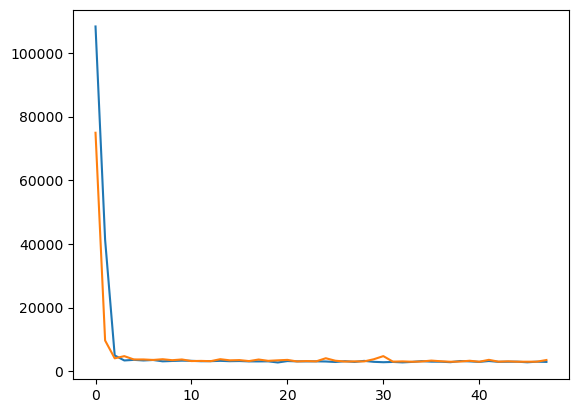

In [62]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

# Training using entire data

In [63]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
19/19 [==============================] - 1s 9ms/step - loss: 102238.4219 - val_loss: 56744.9688
Epoch 2/250
19/19 [==============================] - 0s 3ms/step - loss: 23550.2539 - val_loss: 6158.8926
Epoch 3/250
19/19 [==============================] - 0s 3ms/step - loss: 4035.7566 - val_loss: 3702.6343
Epoch 4/250
19/19 [==============================] - 0s 3ms/step - loss: 3410.8987 - val_loss: 3914.6489
Epoch 5/250
19/19 [==============================] - 0s 2ms/step - loss: 3439.0449 - val_loss: 4049.4915
Epoch 6/250
19/19 [==============================] - 0s 3ms/step - loss: 3449.8804 - val_loss: 4362.8296
Epoch 7/250
19/19 [==============================] - 0s 3ms/step - loss: 3266.3501 - val_loss: 3242.8572
Epoch 8/250
19/19 [==============================] - 0s 3ms/step - loss: 3527.2390 - val_loss: 4559.1123
Epoch 9/250
19/19 [==============================] - 0s 3ms/step - loss: 3146.2048 - val_loss: 3406.3989
Epoch 10/250
19/19 [==============================]

In [65]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [66]:
Xnewb[Xnew.columns]

KeyError: "['Gender_Female'] not in index"

In [67]:
Xnewb['Gender_Female']=0

In [68]:
final_DF = Xnewb[Xnew.columns]

In [69]:
pred = nn.predict(final_DF)

1/1 [==============================] - 0s 42ms/step


In [70]:
pred

array([[350.56396],
       [363.44275],
       [350.25046],
       [345.1979 ],
       [364.3452 ],
       [357.4768 ],
       [365.6568 ],
       [358.15118],
       [359.40228],
       [373.52087],
       [369.1071 ],
       [338.5612 ],
       [339.58554],
       [340.1477 ],
       [365.68085]], dtype=float32)

In [71]:
D_cust["Loan_new_term"]=pred

C:\Users\Suja4\AppData\Local\Temp\ipykernel_20996\2004779754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_cust["Loan_new_term"]=pred


In [72]:
D_cust

Loan_ID Gender Married Dependents     Education Self_Employed  \
59   LP001324   Male     Yes         3+      Graduate            No   
84   LP001450   Male     Yes          0      Graduate            No   
103  LP001548   Male     Yes          2  Not Graduate            No   
141  LP001787   Male     Yes         3+      Graduate            No   
144  LP001794   Male     Yes          2      Graduate           Yes   
164  LP001921   Male      No          1      Graduate            No   
173  LP001979   Male      No          0      Graduate            No   
232  LP002306   Male     Yes          0      Graduate            No   
245  LP002355   Male     Yes          0      Graduate            No   
249  LP002376   Male      No          0      Graduate            No   
325  LP002802   Male      No          0      Graduate            No   
338  LP002857   Male     Yes          1      Graduate           Yes   
342  LP002869   Male     Yes         3+  Not Graduate            No   
354  LP002921   Male     Yes         3+  Not Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
59              4720                  0        90.0             180.0   
84              4456                  0       131.0             180.0   
103             2687                  0        50.0             180.0   
141             3089               2999       100.0             240.0   
144            10890                  0       260.0              12.0   
164             3180               2370        80.0             240.0   
173             3017               2845       159.0             180.0   
232             1173               1594        28.0             180.0   
245             3186               3145       150.0             180.0   
249             2925                  0        40.0             180.0   
325             2875               2416        95.0               6.0   
338             2360               3355        87.0             240.0   
342             3522                  0        81.0             180.0   
354             5316                187       158.0             180.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area Loan_Status  Loan_new_term  
59              1.0     Semiurban           N     350.563965  
84              0.0     Semiurban           N     363.442749  
103             1.0         Rural           N     350.250458  
141             1.0         Rural           N     345.197906  
144             1.0         Rural           N     364.345215  
164             1.0         Rural           N     357.476807  
173             0.0         Urban           N     365.656799  
232             1.0         Rural           N     358.151184  
245             0.0     Semiurban           N     359.402283  
249             1.0         Rural           N     373.520874  
325             0.0     Semiurban           N     369.107086  
338             1.0         Rural           N     338.561188  
342             1.0         Rural           N     339.585541  
354             0.0     Semiurban           N     340.147705  
366             1.0         Rural           N     365.680847